In [3]:
from yunchieh_plotlib.Plot_function import plot_histogram
import matplotlib.pyplot as plt

C:\Users\4019-tjyen\AppData\Local\Temp\ipykernel_34452\1931318643.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_diffs = data_cleaned.groupby(["series_id","night"]).apply\


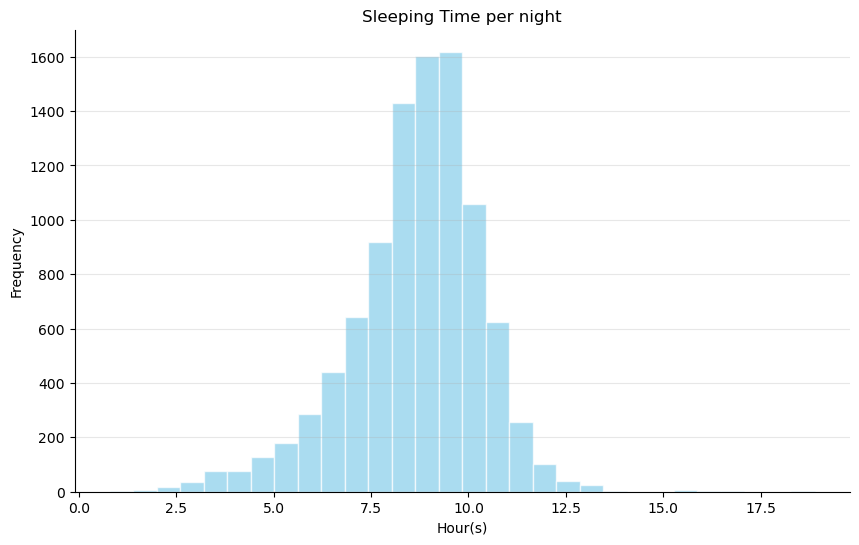

In [4]:
#function example
import pandas as pd
import numpy as np


data = pd.read_csv(r"C:\Users\4019-tjyen\Desktop\new_data.csv")

data["timestamp"] = pd.to_datetime(data["timestamp"], errors ="coerce")

data_cleaned = data.dropna(subset = ["timestamp"])
num_data_cleaned = data_cleaned.iloc[:,0]
num_items = num_data_cleaned.shape[0]



def calculate_time_diff(group):
    #sort by timestamp
    group = group.sort_values("timestamp")
    wakeup_time = group.loc[group["event"] == "wakeup", "timestamp"]
    onset_time = group.loc[group["event"] =="onset", "timestamp"]
    
    if not wakeup_time.empty and not onset_time.empty:
        time_diff = (wakeup_time.iloc[0] - onset_time.iloc[0]).total_seconds()/3600 
        return time_diff
     
    return None

time_diffs = data_cleaned.groupby(["series_id","night"]).apply\
    (lambda group:calculate_time_diff(group.drop(columns=["series_id", "night"]))).reset_index(name = "time_diff")


data_final = data_cleaned.merge(time_diffs, on = ["series_id", "night"], how = "left")


data_final["timestamp"] = pd.to_datetime(data_final["timestamp"])

data_final['date'] = data_final['timestamp'].dt.date

#print(data_final[['series_id', 'night', 'timestamp', 'event','time_diff']].head())


fig, ax = plt.subplots(figsize=(10,6))

plot_histogram(
    ax,
    data_final, 
    column="time_diff", 
    bins=30, 
    set_title= "Sleeping Time per night",
    set_xlabel= "Hour(s)",
    set_ylabel= "Frequency", 
)

plt.show()